## Dependencias 

In [75]:
import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

from functools import reduce 
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf

from scipy import stats

cf.go_offline()

## Datos sintéticos

In [2]:
def f(x,y):
    return np.sin(x**2)-(2*np.cos(y))**2-x**3

In [3]:
X = np.random.uniform(size=10000) 
Y = np.random.uniform(size=10000)
X.shape,Y.shape

((10000,), (10000,))

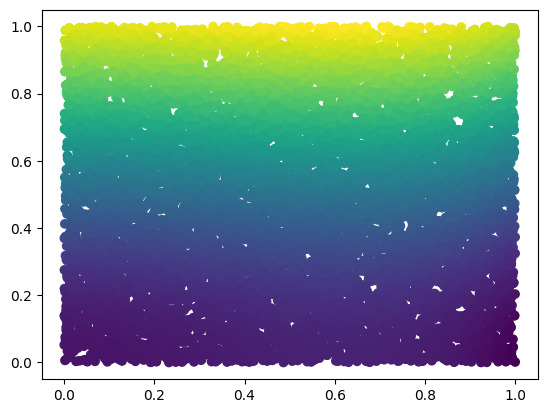

In [4]:
plt.scatter(X,Y,c=f(X,Y),cmap='viridis')

In [5]:
Z = np.vectorize(f)(X,Y)

(array([1417., 1811., 1153.,  960.,  865.,  842.,  767.,  765.,  803.,
         617.]),
 array([-4.15828146, -3.84586325, -3.53344505, -3.22102684, -2.90860864,
        -2.59619043, -2.28377223, -1.97135403, -1.65893582, -1.34651762,
        -1.03409941]),
 <BarContainer object of 10 artists>)

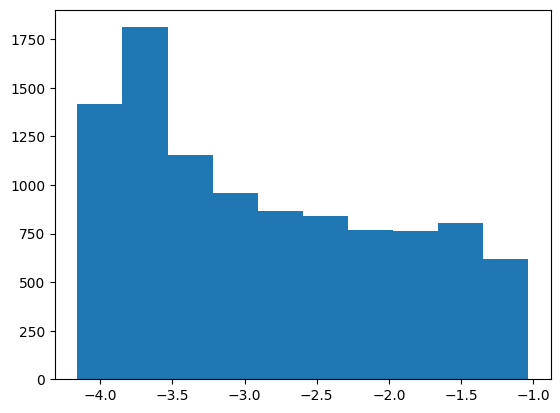

In [6]:
plt.hist(Z)

In [7]:
df = pd.DataFrame({'X':X,'Y':Y,'Z':Z})
df.shape

(10000, 3)

In [8]:
df.head()

,X,Y,Z
0,0.370723,0.858261,-1.623528
1,0.784509,0.320236,-3.509128
2,0.805677,0.058298,-3.904916
3,0.284133,0.700465,-2.280398
4,0.653649,0.430007,-3.169755


In [9]:
df.sample(300).iplot(kind='scatter3d',x='X',y='Y',z='Z',mode='markers',color='purple')

## Partición

In [11]:
Xt,Xv,Yt,Yv = train_test_split(df[['X','Y']],df['Z'],test_size=0.3)
Xt.reset_index(drop=True,inplace=True)
Xv.reset_index(drop=True,inplace=True)
Yt.reset_index(drop=True,inplace=True)
Yv.reset_index(drop=True,inplace=True)
Xt.shape,Xv.shape,Yt.shape,Yv.shape

((7000, 2), (3000, 2), (7000,), (3000,))

In [12]:
Xt.head()

,X,Y
0,0.667185,0.542714
1,0.129875,0.810362
2,0.060246,0.309342
3,0.090700,0.330103
4,0.017822,0.794331


## Pre-tratamiento

In [13]:
scx = MinMaxScaler()
scy = MinMaxScaler()


In [19]:
scx.fit(Xt)
scy.fit(np.array(Yt).reshape(-1,1))

MinMaxScaler()

In [22]:
Xts = pd.DataFrame(scx.transform(Xt),columns=Xt.columns)
Xts.describe()

,X,Y
count,7000.000000,7000.000000
mean,0.498966,0.499305
std,0.289376,0.285529
min,0.000000,0.000000
25%,0.241691,0.255612
50%,0.497373,0.500401
75%,0.750083,0.742827
max,1.000000,1.000000


In [25]:
Yts = scy.transform(np.array(Yt).reshape(-1,1))

In [29]:
pd.DataFrame(Yts).describe()

,0
count,7000.000000
mean,0.417251
std,0.282997
min,0.000000
25%,0.153700
50%,0.363503
75%,0.656175
max,1.000000


## Aprendizaje

In [30]:
modelo = MLPRegressor()

### Espacio híperparamétrico

In [32]:
hp = {
    'hidden_layer_sizes': [(a,b,) for a in range(3,11) for b in range(3,11)],
    'activation': ['relu', 'tanh', 'logistic','identity']
}

In [33]:
reduce(lambda x,y:x*y,map(len,hp.values()))

256

### Selección de hiperparámetros

In [34]:
grid = RandomizedSearchCV(modelo,
                          param_distributions=hp,
                          n_iter=100,
                          cv=5,
                          scoring='neg_mean_absolute_error',
                          n_jobs=-1,
                          verbose=True)

In [55]:
grid.fit(Xts,Yts)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/josegustavofuentescabrera/entornos/plurall/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/josegustavofuentescabrera/entornos/plurall/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/josegustavofuentescabrera/entornos/plurall/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/josegustavofuentescabrer

RandomizedSearchCV(cv=5, estimator=MLPRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh',
                                                       'logistic', 'identity'],
                                        'hidden_layer_sizes': [(3, 3), (3, 4),
                                                               (3, 5), (3, 6),
                                                               (3, 7), (3, 8),
                                                               (3, 9), (3, 10),
                                                               (4, 3), (4, 4),
                                                               (4, 5), (4, 6),
                                                               (4, 7), (4, 8),
                                                               (4, 9), (4, 10),
                                                               (5, 3), (5, 4),
                                                               (5, 5), (5, 6),
                                                               (5, 7), (5, 8),
                                                               (5, 9), (5, 10),
                                                               (6, 3), (6, 4),
                                                               (6, 5), (6, 6),
                                                               (6, 7), (6, 8), ...]},
                   scoring='neg_mean_absolute_error', verbose=True)

In [56]:
grid.best_params_

{'hidden_layer_sizes': (9, 9), 'activation': 'relu'}

In [57]:
grid.best_score_

-0.020178575886717474

In [58]:
modelo = grid.best_estimator_

In [59]:
modelo

MLPRegressor(hidden_layer_sizes=(9, 9))

## Aprendizaje de parámetros $\theta$

In [60]:
modelo.fit(Xts,Yts)

/Users/josegustavofuentescabrera/entornos/plurall/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MLPRegressor(hidden_layer_sizes=(9, 9))

In [61]:
for c in modelo.coefs_:
    print(c.shape)

(2, 9)
(9, 9)
(9, 1)


## Validación del modelo

In [71]:
aux = Xv.copy()
aux['Z^'] = scy.inverse_transform(modelo.predict(scx.transform(Xv)).reshape(-1,1))
aux['Z'] = Yv
aux.describe()

/Users/josegustavofuentescabrera/entornos/plurall/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names



,X,Y,Z^,Z
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.500539,0.498952,-2.856356,-2.853436
std,0.286054,0.287680,0.884552,0.895345
min,0.000343,0.000535,-4.371769,-4.144708
25%,0.257211,0.255087,-3.649213,-3.681192
50%,0.499603,0.489899,-2.948777,-3.051424
75%,0.746529,0.746030,-2.091598,-2.088868
max,0.999692,0.999920,-1.163107,-1.038838


<Axes: xlabel='Z', ylabel='Density'>

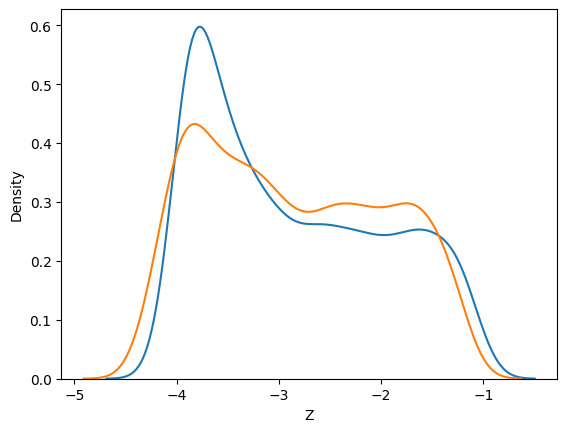

In [72]:
sns.kdeplot(aux['Z'])
sns.kdeplot(aux['Z^'])

<Axes: xlabel='Z', ylabel='Density'>

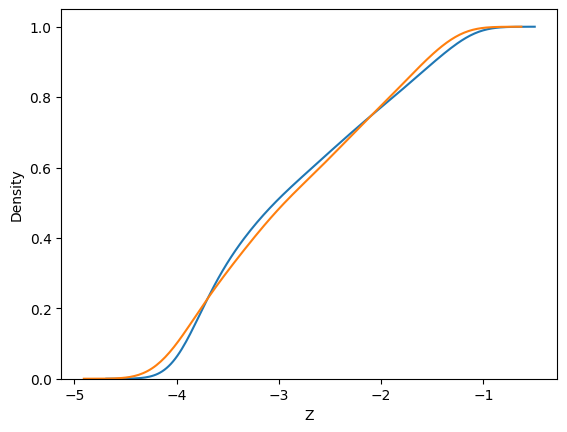

In [74]:
sns.kdeplot(aux['Z'],cumulative=True)
sns.kdeplot(aux['Z^'],cumulative=True)

In [76]:
stats.ks_2samp(aux['Z'],aux['Z^'])

KstestResult(statistic=0.07566666666666666, pvalue=6.847866957146764e-08, statistic_location=-3.999952854730613, statistic_sign=-1)

In [73]:
aux.sample(5)

,X,Y,Z^,Z
166,0.748323,0.766839,-1.946382,-1.962095
621,0.182735,0.115568,-4.029292,-3.919529
2125,0.936927,0.017620,-3.905368,-4.051866
984,0.627294,0.206561,-3.742272,-3.695161
2836,0.309465,0.851683,-1.709677,-1.669650


## Valores difíciles

In [79]:
np.abs(aux['Z']-aux['Z^']).sort_values(ascending=False)

1505    0.399228
938     0.397658
2569    0.385784
2234    0.382616
2621    0.380155
          ...   
2148    0.000541
2135    0.000316
217     0.000160
2143    0.000036
1848    0.000005
Length: 3000, dtype: float64

In [80]:
aux.loc[np.abs(aux['Z']-aux['Z^'])>0.3]

,X,Y,Z^,Z
111,0.505629,0.004165,-4.246223,-3.876315
116,0.565819,0.013031,-4.174880,-3.865758
141,0.385016,0.028006,-4.245701,-3.906242
160,0.009948,0.016171,-4.337501,-3.998856
278,0.285675,0.028066,-4.261215,-3.938645
476,0.193884,0.019978,-4.298645,-3.968110
492,0.250909,0.032230,-4.254893,-3.948729
603,0.289939,0.016929,-4.292127,-3.939262
826,0.528909,0.013301,-4.207380,-3.871142
926,0.310238,0.027421,-4.259167,-3.930754
